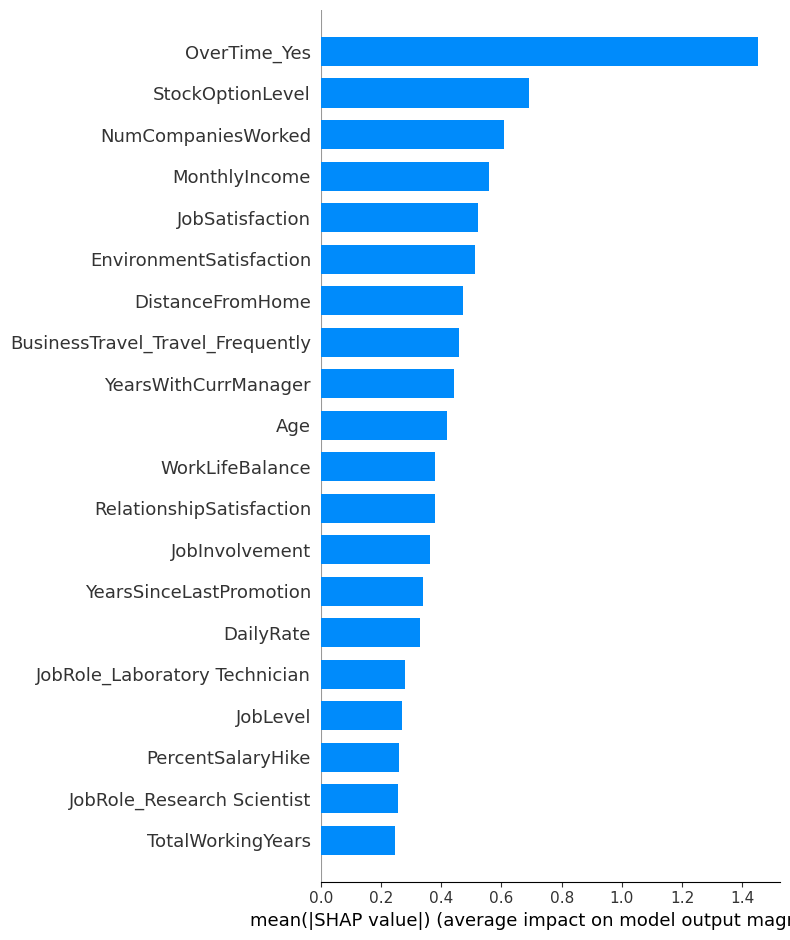

In [11]:
# Notebook #3: SHAP Interpretation for XGBoost

import shap
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Reload dataset & preprocess like before
df = pd.read_csv("/Users/shauryadityasingh/Downloads/HR Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Wrap scaled arrays into DataFrames for SHAP compatibility
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train XGBoost for SHAP explanation
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_res_df, y_train_res)

# SHAP explainer setup
explainer = shap.Explainer(model, X_train_res_df)
shap_values = explainer(X_test_scaled_df)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

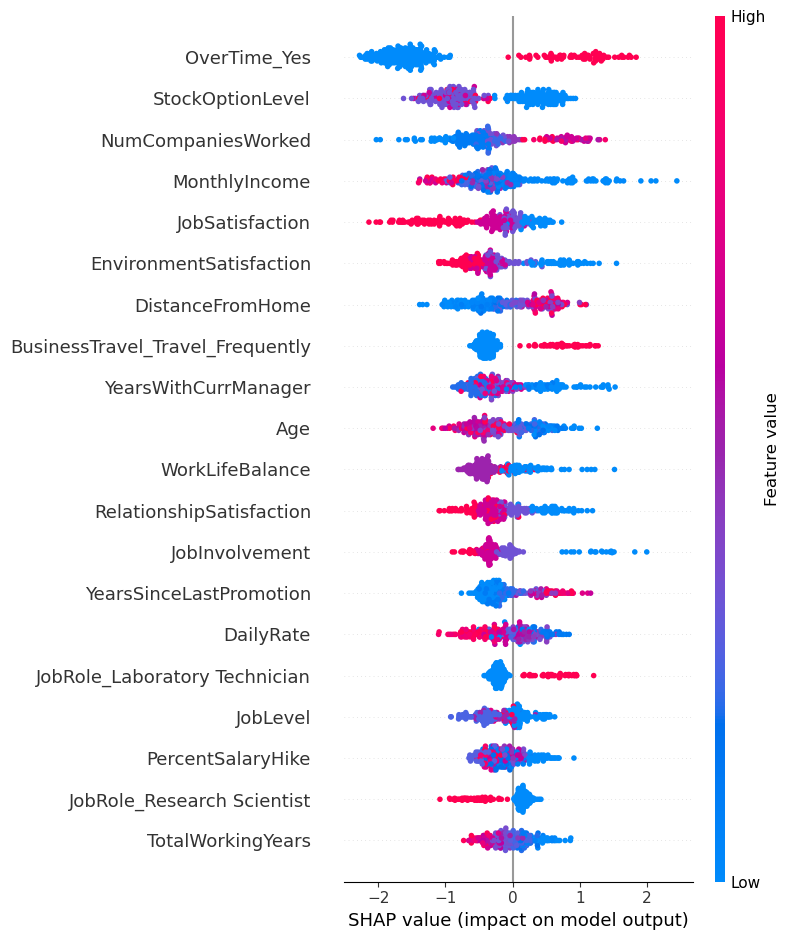

In [12]:
# Detailed beeswarm plot
shap.summary_plot(shap_values, X_test_scaled_df)

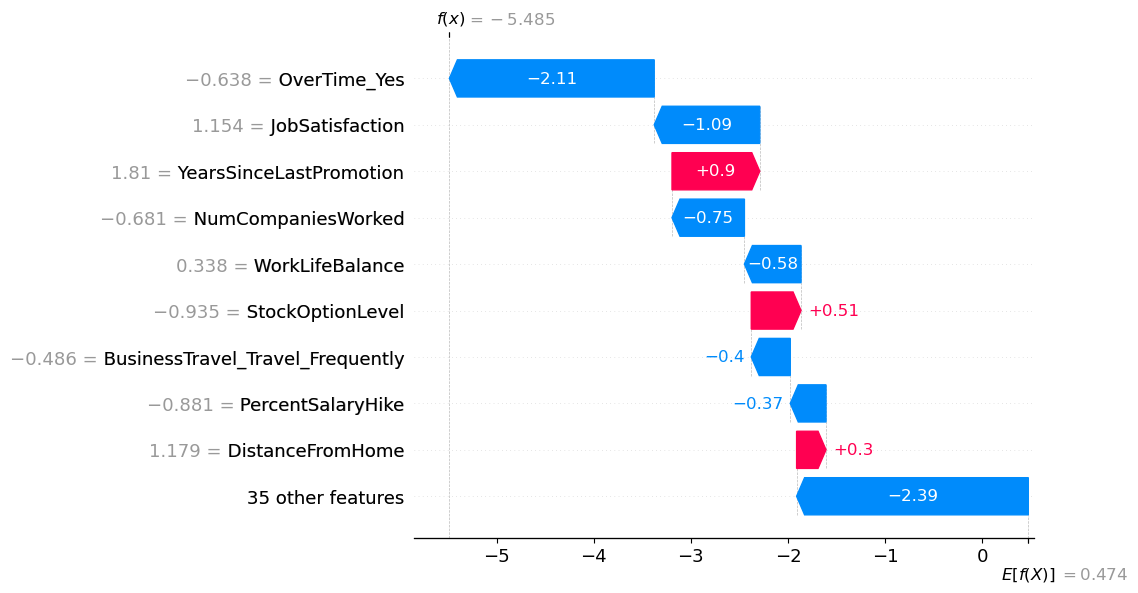

In [13]:
# Explain a single prediction
sample_index = 10
shap.plots.waterfall(shap_values[sample_index])